In [4]:
from __future__ import print_function

import math

import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage.filters as snf

%matplotlib inline
%config InlineBackend.figure_format = "retina"

from realization import realization
from realization import pixel_sample as pixs

In [5]:
nx = 1024
nw = 32
winfunc_x = np.zeros(nx, dtype=float)
winfunc_x[:nw] = 1
winfunc_x /= winfunc_x.sum()

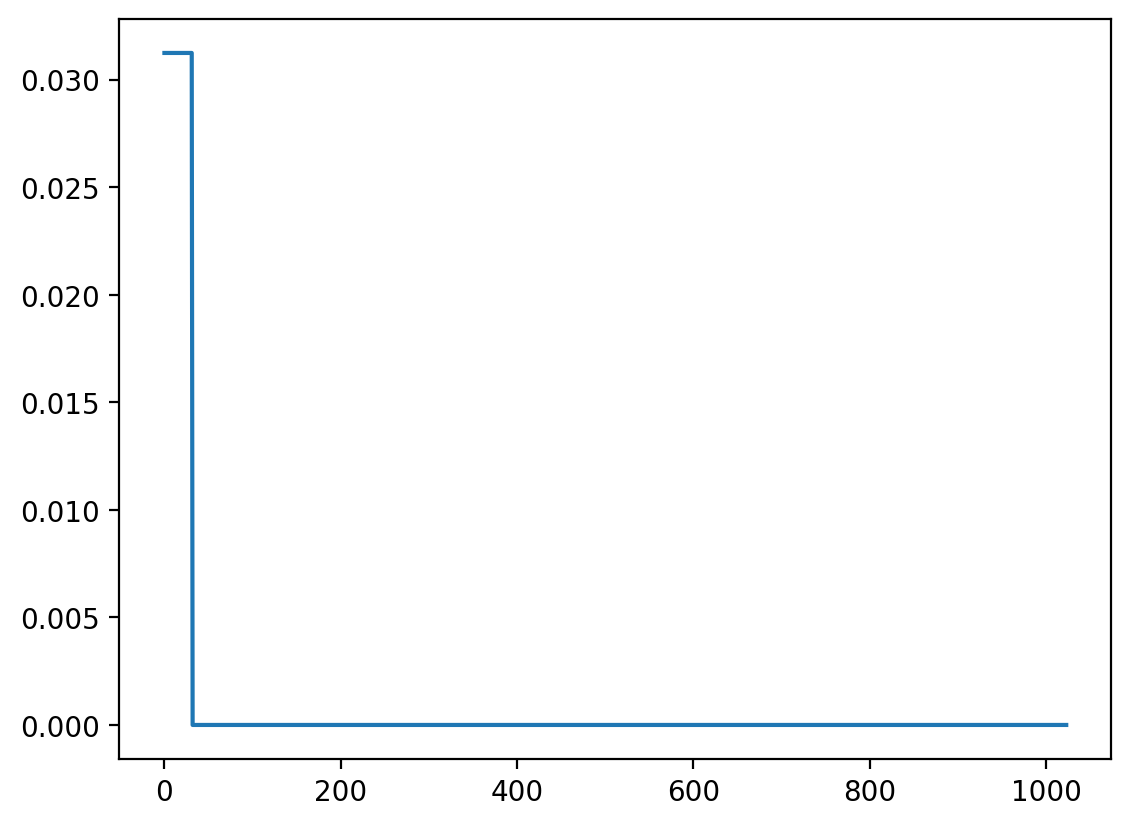

In [6]:
plt.plot(winfunc_x)

In [7]:
winfunc_k = np.fft.rfftn(winfunc_x)
kvals = realization.get_k(winfunc_x.shape)
abskvals = np.sqrt(realization.get_k2(winfunc_x.shape))

#### note that we NEED to divide out by the single-pixel pixwin!
winfunc_k_th = pixs.pixelWindow1D(abskvals,nw)/pixs.pixelWindow1D(abskvals,1)

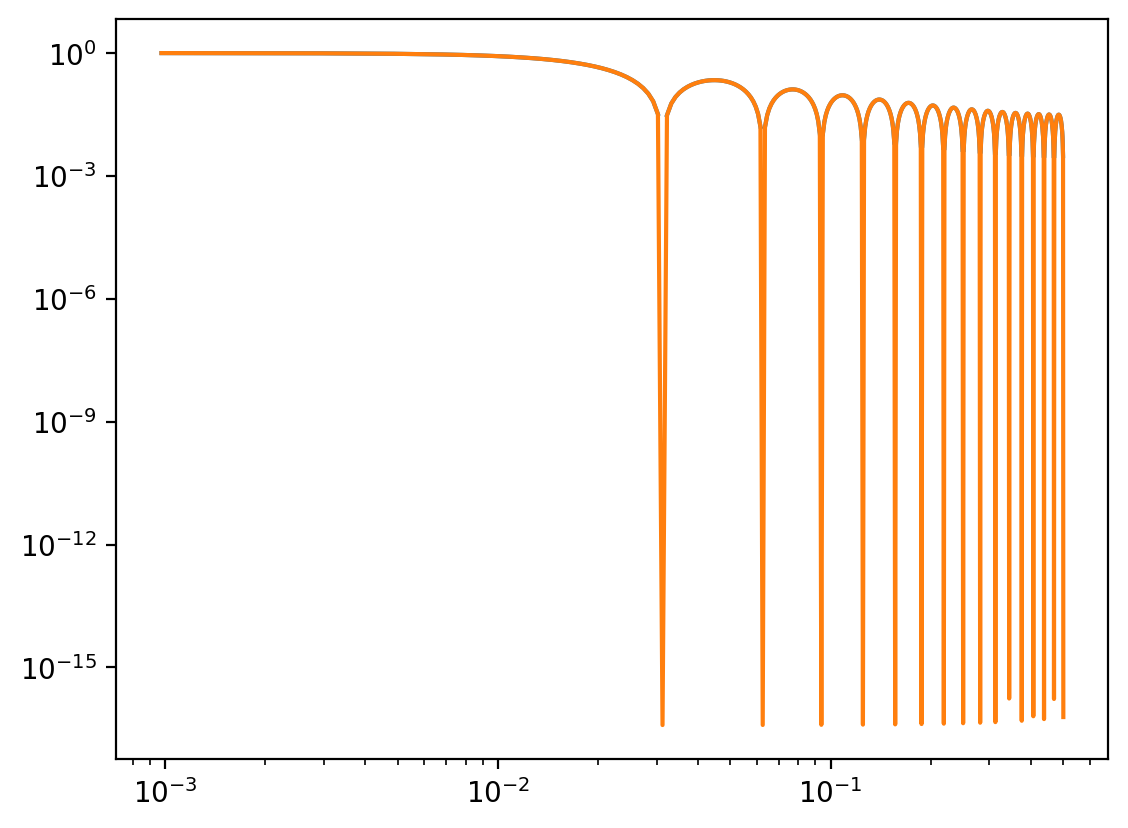

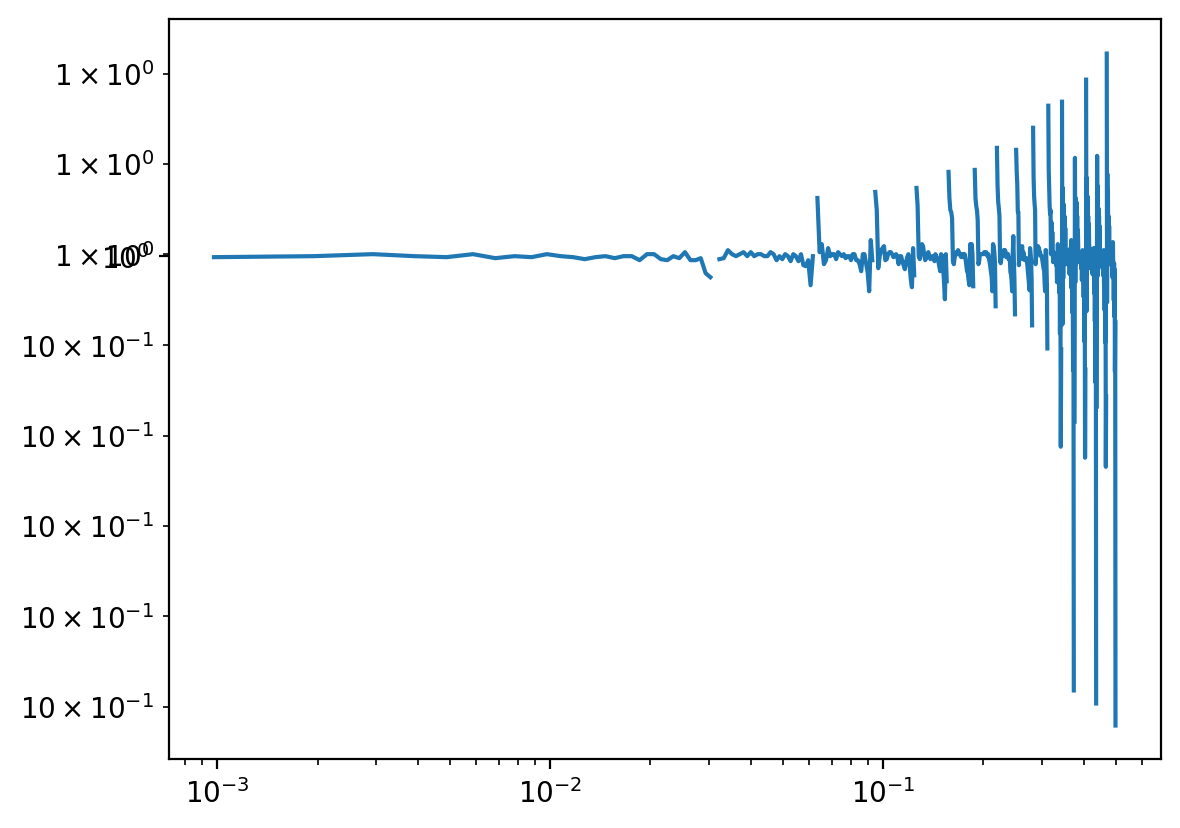

In [8]:
pltr = plt.loglog
pltr(abskvals, np.abs(winfunc_k), nonpositive='mask')
pltr(abskvals, np.abs(winfunc_k_th), nonpositive='mask')
plt.figure()
pltr(abskvals, np.abs(winfunc_k)/np.abs(winfunc_k_th), nonpositive='mask')



In [9]:
npix1d=256
a = np.random.randn(npix1d, npix1d)
f = np.zeros_like(a)
b = snf.uniform_filter(a, size=16, output=f)

/var/folders/q3/p677_6w13_jfg6xzn6p623vm0000gn/T/ipykernel_13046/3968695956.py:4: DeprecationWarning: Please use `uniform_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  b = snf.uniform_filter(a, size=16, output=f)


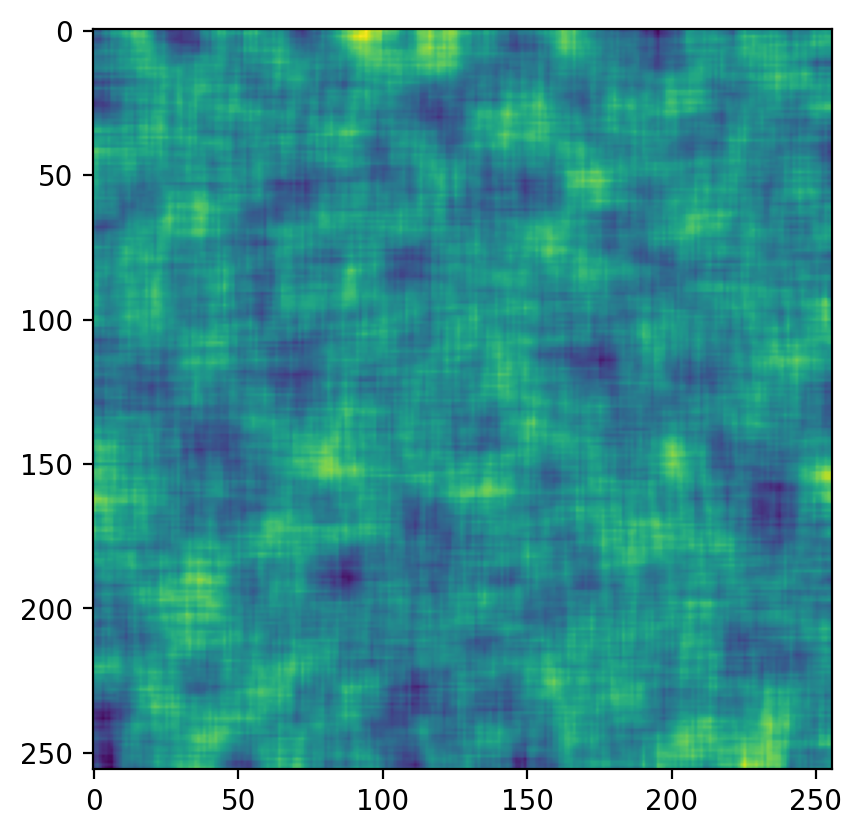

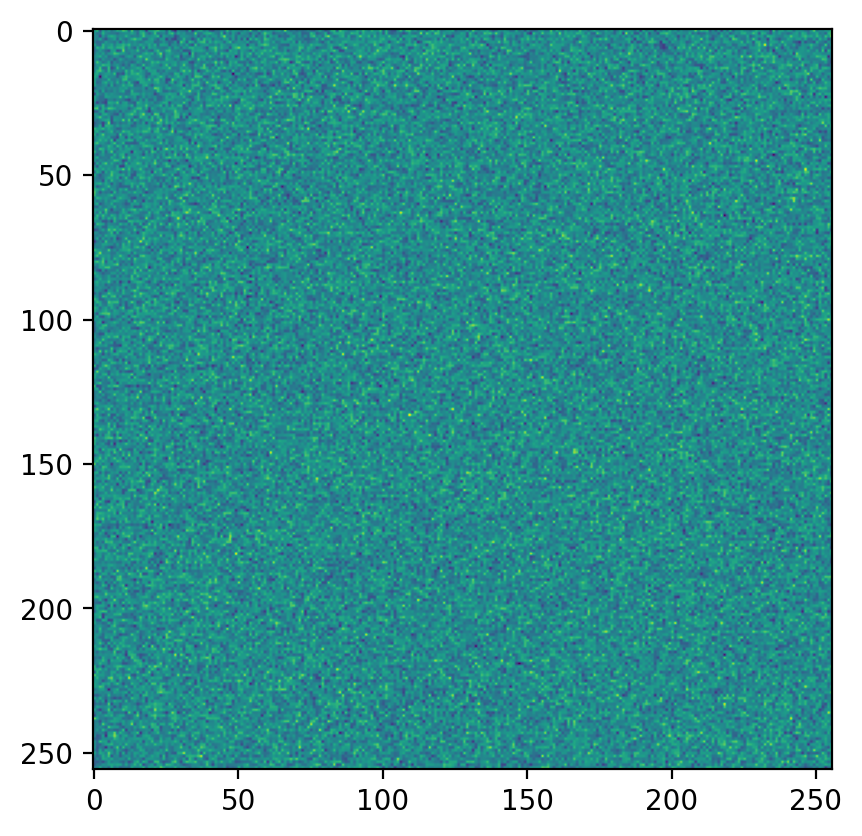

In [10]:
plt.figure(); plt.imshow(f)
plt.figure(); plt.imshow(a)


In [11]:
print(b)

[[-0.1062255  -0.11698969 -0.13047711 ...  0.06023627  0.04928094
   0.04234126]
 [-0.06975513 -0.07154867 -0.07714982 ...  0.05827783  0.04578515
   0.04393043]
 [-0.10483093 -0.11210906 -0.11983717 ...  0.09527768  0.09344762
   0.0941657 ]
 ...
 [-0.20380604 -0.17570327 -0.21273177 ...  0.00645634  0.01872471
   0.02687754]
 [-0.15796735 -0.12158696 -0.16710951 ... -0.01674248  0.00633292
   0.00786542]
 [-0.1818011  -0.14007989 -0.18537841 ... -0.00300888  0.02286286
   0.0431849 ]]
